### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import dateutil
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate,  KFold

In [3]:
# Import dataset
df = pd.read_csv('/content/drive/MyDrive/PROJECTS/KAG_energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# columns value_count
df.apply(lambda x: len(x.unique()))

,0
date,19735
Appliances,92
lights,8
T1,722
RH_1,2547
T2,1650
RH_2,3376
T3,1426
RH_3,2618
T4,1390


In [7]:
df_copy=df.copy()

In [8]:
Temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
Humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
Weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"]
Lighting = ["lights"]
Random = ["rv1", "rv2"]
target = ["Appliances"]

array([[<Axes: title={'center': 'Appliances'}>,
        <Axes: title={'center': 'T1'}>, <Axes: title={'center': 'T2'}>,
        <Axes: title={'center': 'T3'}>, <Axes: title={'center': 'T4'}>],
       [<Axes: title={'center': 'T5'}>, <Axes: title={'center': 'T6'}>,
        <Axes: title={'center': 'T7'}>, <Axes: title={'center': 'T8'}>,
        <Axes: title={'center': 'T9'}>],
       [<Axes: title={'center': 'RH_1'}>,
        <Axes: title={'center': 'RH_2'}>,
        <Axes: title={'center': 'RH_3'}>,
        <Axes: title={'center': 'RH_4'}>,
        <Axes: title={'center': 'RH_5'}>],
       [<Axes: title={'center': 'RH_6'}>,
        <Axes: title={'center': 'RH_7'}>,
        <Axes: title={'center': 'RH_8'}>,
        <Axes: title={'center': 'RH_9'}>,
        <Axes: title={'center': 'T_out'}>],
       [<Axes: title={'center': 'Tdewpoint'}>,
        <Axes: title={'center': 'RH_out'}>,
        <Axes: title={'center': 'Press_mm_hg'}>,
        <Axes: title={'center': 'Windspeed'}>,
        <Axe

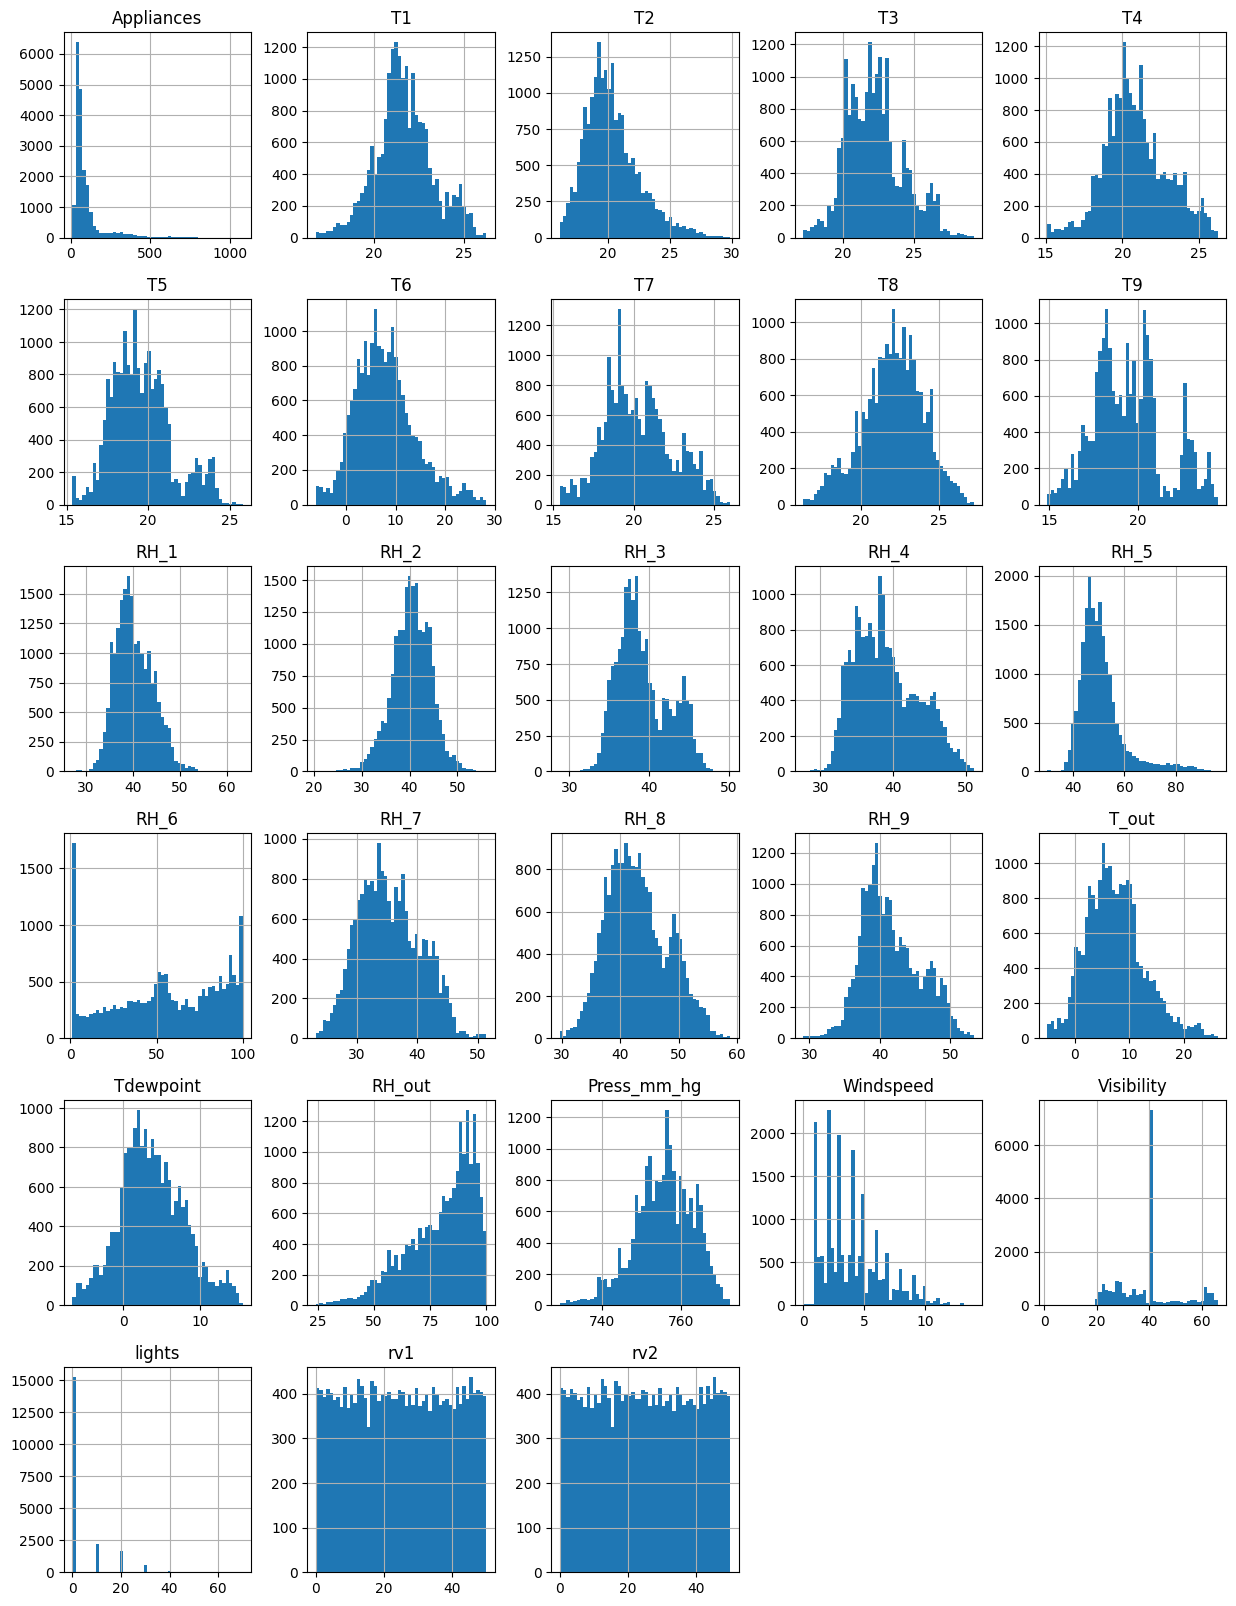

In [9]:
df_copy[target + Temp+ Humidity+ Weather+ Lighting+ Random].hist(bins=50, figsize=(15,20))

### Performing Feature Engineering to extract more useful features

In [10]:
df['date']=pd.to_datetime(df['date']) #Convert date column to datetime

#Extract hour, month
df['hour']=df['date'].dt.hour
df['month']=df['date'].dt.month
df['weekday']=df['date'].dt.weekday

In [11]:
df.drop('date', axis=1, inplace=True)

In [12]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,month,weekday
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,0.216792,-0.011606,0.003060
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,0.255346,-0.179452,-0.099828
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.178858,0.706305,0.001381
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,0.018594,-0.094048,-0.053782
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.254784,0.533479,0.000602
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.183322,-0.097914,-0.044249
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.037624,0.790365,-0.017514
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.052392,-0.414359,-0.035182
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.088407,0.789168,-0.091006
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.019068,-0.258167,-0.005749


### VIsualization

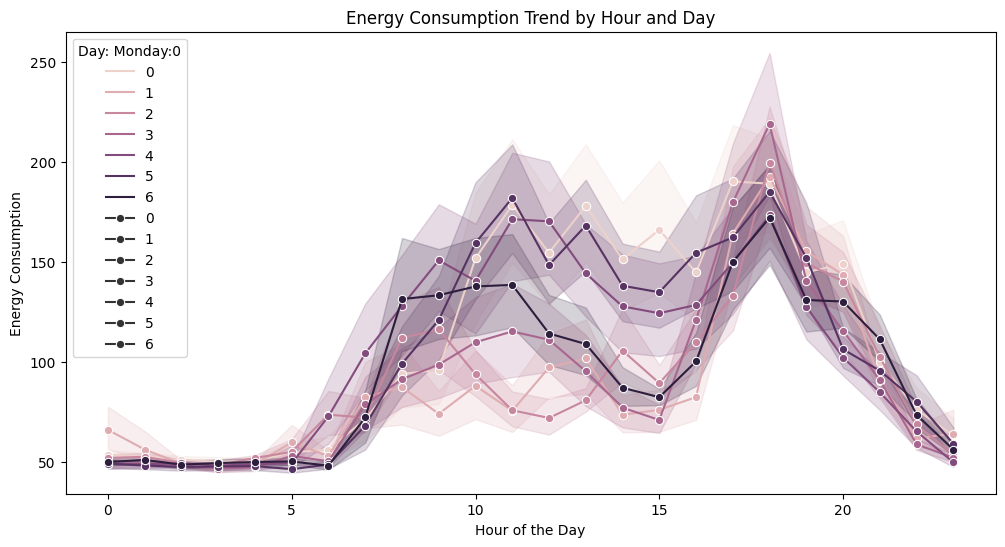

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='Appliances', hue='weekday', style='weekday', markers=['o'], dashes=False)
plt.title('Energy Consumption Trend by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.legend(title='Day: Monday:0')

plt.savefig('Energy consumption by_day.png')
plt.show()

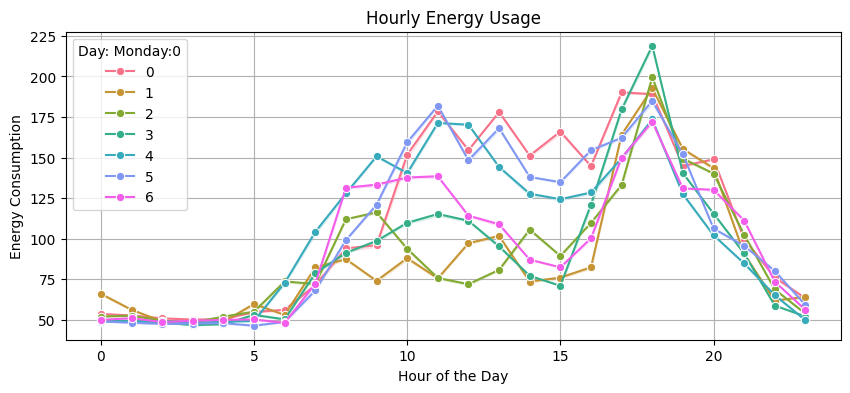

In [14]:


plt.figure(figsize=(10, 4))

color_palette = sns.color_palette("husl", 7)
sns.lineplot(data=df, x='hour', y='Appliances', hue='weekday', marker='o', palette=color_palette, linestyle='-', ci =False)
plt.title('Hourly Energy Usage')
plt.legend(title='Day: Monday:0')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.savefig('Hourly Energy consumption.png')
plt.show()

In [15]:
hour_group=df.groupby(['hour', 'weekday'])['lights'].mean().reset_index()

In [16]:
hour_group

,hour,weekday,lights
0,0,0,4.473684
1,0,1,9.500000
2,0,2,3.666667
3,0,3,2.916667
4,0,4,1.000000
...,...,...,...
163,23,2,5.416667
164,23,3,4.083333
165,23,4,2.105263
166,23,5,1.754386


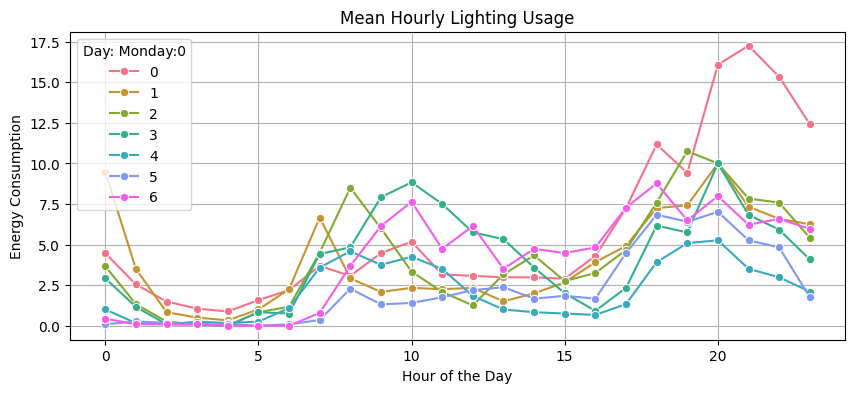

In [17]:
plt.figure(figsize=(10, 4))
color_palette = sns.color_palette("husl", 7)
sns.lineplot(data=hour_group, x='hour', y='lights', palette= color_palette, hue='weekday', marker='o', ci = False)
plt.title('Mean Hourly Lighting Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.legend(title='Day: Monday:0')
plt.grid(True)
plt.savefig('Energy consumption by_day2.png')
plt.show()

### Preparing dataset for modelling

In [ ]:
#df_copy= df_copy[df_copy['Appliances'].between(df_copy['Appliances'].quantile(.0), df['Appliances'].quantile(.99))]

In [18]:
#numeric_df = df.select_dtypes(include=[float, int]) # Select only numeric columns for correlation calculation
corr_matrix = df.corr(method='pearson') # Calculate the correlation matrix
matrix = corr_matrix["Appliances"].sort_values(ascending=False) # Get the correlation values for the 'appliances' column and sort them
print(matrix)

Appliances     1.000000
hour           0.216792
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
weekday        0.003060
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
month         -0.011606
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


<Axes: >

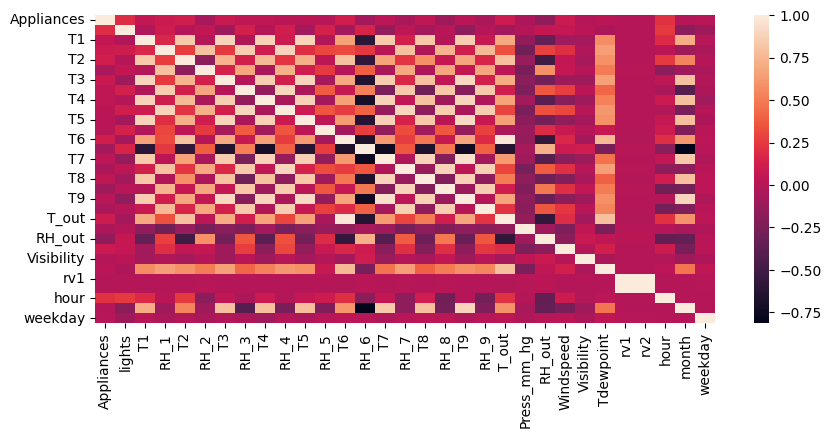

In [19]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix)

In [20]:
df['lights'] = df['lights'].astype(float)

In [ ]:
features_set=list(matrix[(matrix>0.01) | (matrix<-0.03)].index) # Selecting features with corr above 0.003 with the target
features_set

Considering the correlation between the target and the features, the above features have fairly positive and negative realtion.
They are thus chosen for the prediction

In [21]:
df=df.rename({'Appliances':'EnergyConsumption'}, axis=1)


Data splitting

In [22]:
x=df.drop(['Visibility', 'rv1', 'rv2', 'EnergyConsumption', 'month'], axis=1)
y=df['EnergyConsumption']

In [26]:
x.shape

(19735, 26)

In [35]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.19))
X=sel.fit_transform(x)
X.shape

(19735, 26)

In [ ]:
#x_1=df_copy.drop(['Visibility', 'rv1', 'rv2', 'EnergyConsumption', 'appliances_log', 'month', 'hour'], axis=1)
#y_1=df_copy['EnergyConsumption']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [37]:
def test_eva(model, Test, labels):

    pred=model.predict(Test) # Predict

    # Evaluation metrics
    mae=mean_absolute_error(labels, pred)
    rmse=np.sqrt(mean_squared_error(labels, pred))
    mape=mean_absolute_percentage_error(labels, pred)
    R2_score=r2_score(labels, pred)

    print(model,'\n')
    print('Performance on testing set')
    print('MAE       : {:0.6f} degrees'.format(mae))
    print('R^2 Score  : {:0.6f}' .format(R2_score))
    print('MAPE :{:0.6f}'.format(mape))
    print('RMSE : {:0.6f}'.format(rmse))
    print('Accuracy            : {:0.6f}%\n'.format(100*(1-mape)))

In [38]:
def train_eva(model, train_x, train_y):
  train_pred=model.predict(train_x) # Predict

    # Evaluation metrics
  mae=mean_absolute_error(train_y, train_pred)
  rmse=np.sqrt(mean_squared_error(train_y, train_pred))
  mape=mean_absolute_percentage_error(train_y, train_pred)
  R2_score=r2_score(train_y, train_pred)

  print('Performance on training set')
  print('MAE       : {:0.6f} degrees'.format(mae))
  print('R^2 Score  : {:0.6f}' .format(R2_score))
  print('MAPE :{:0.6f}'.format(mape))
  print('RMSE : {:0.6f}'.format(rmse))
  print('Accuracy            : {:0.6f}%\n'.format(100*(1-mape)))

In [39]:
et_model=ExtraTreesRegressor(max_depth=40, max_features='log2', n_estimators=944)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=40, max_features='log2', n_estimators=944)

In [40]:
test_eva(et_model, X_test, y_test)
print('---------------------------------')
train_eva(et_model, X_train, y_train)

ExtraTreesRegressor(max_depth=40, max_features='log2', n_estimators=944) 

Performance on testing set
MAE       : 28.759650 degrees
R^2 Score  : 0.615518
MAPE :0.274186
RMSE : 63.966165
Accuracy            : 72.581372%

---------------------------------
Performance on training set
MAE       : 0.011551 degrees
R^2 Score  : 0.999999
MAPE :0.000111
RMSE : 0.074049
Accuracy            : 99.988944%



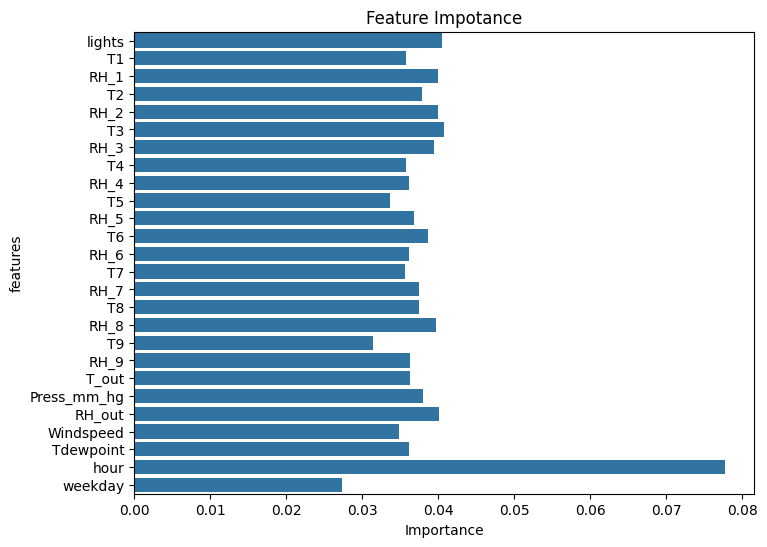

In [41]:
imp = et_model.feature_importances_
feat_imp = pd.DataFrame({'features':X_train.columns, 'Importance':imp})
plt.figure(figsize=(8,6))
sns.barplot(feat_imp, x='Importance', y='features')
plt.title('Feature Impotance')
plt.show()

In [42]:
dt_model=DecisionTreeRegressor()
rf_model=RandomForestRegressor(bootstrap=False, max_depth=40, max_features='log2',
                      n_estimators=944)
xg_model=XGBRegressor()

In [43]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xg_model.fit(X_train, y_train)
svr_model=SVR()
svr_model.fit(X_train, y_train)

SVR()

### Random Forest Regressor

In [44]:
test_eva(rf_model, X_test, y_test)
print('---------------------------------')
train_eva(rf_model, X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='log2',
                      n_estimators=944) 

Performance on testing set
MAE       : 29.043344 degrees
R^2 Score  : 0.604670
MAPE :0.277111
RMSE : 64.862281
Accuracy            : 72.288853%

---------------------------------
Performance on training set
MAE       : 0.006848 degrees
R^2 Score  : 1.000000
MAPE :0.000123
RMSE : 0.019950
Accuracy            : 99.987691%



### XGboost

In [45]:
test_eva(xg_model, X_test, y_test)
print('---------------------------------')
train_eva(xg_model, X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 

Performance on testing set
MAE       : 36.662041 degrees
R^2 Score  : 0.503923
MAPE :0.376203
RMSE : 72.658605
Accuracy            : 62.379679%

---------------------------------
Performance on training set
MAE       : 21.055531 degrees
R^2 Score  : 0

SVR

In [46]:
test_eva(svr_model, X_test, y_test)
print('---------------------------------')
train_eva(svr_model, X_train, y_train)

SVR() 

Performance on testing set
MAE       : 49.060530 degrees
R^2 Score  : -0.100393
MAPE :0.368135
RMSE : 108.214718
Accuracy            : 63.186546%

---------------------------------
Performance on training set
MAE       : 48.180603 degrees
R^2 Score  : -0.097729
MAPE :0.366128
RMSE : 107.126446
Accuracy            : 63.387160%



DT

In [47]:
test_eva(dt_model, X_test, y_test)
print('---------------------------------')
train_eva(dt_model, X_train, y_train)

DecisionTreeRegressor() 

Performance on testing set
MAE       : 39.216349 degrees
R^2 Score  : 0.190062
MAPE :0.372677
RMSE : 92.840663
Accuracy            : 62.732297%

---------------------------------
Performance on training set
MAE       : 0.000000 degrees
R^2 Score  : 1.000000
MAPE :0.000000
RMSE : 0.000000
Accuracy            : 100.000000%



STACKING MODEL
Combining three different models, including ETR, RFR, SVR, DT and XGB, using LinearRegressor as the meta_model.

In [48]:
#Instantiate the meta_model's algorithm
meta_model=LinearRegression()


In [49]:
#Preparing the estimator list
estimators=[('ETR', et_model), ('RFR', rf_model), ('XGB', xg_model), ('DT', dt_model), ('SVR', svr_model)]


In [50]:
# Train the stackmodel
from sklearn.ensemble import StackingRegressor
stack_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)
stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('ETR',
                               ExtraTreesRegressor(max_depth=40,
                                                   max_features='log2',
                                                   n_estimators=944)),
                              ('RFR',
                               RandomForestRegressor(bootstrap=False,
                                                     max_depth=40,
                                                     max_features='log2',
                                                     n_estimators=944)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            e...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('DT', DecisionTreeRegressor()), ('SVR', SVR())],
                  final_estimator=LinearRegression())

Performance checking


In [51]:
test_eva(stack_model, X_test, y_test)
print('---------------------------------')
train_eva(stack_model, X_train, y_train)

StackingRegressor(estimators=[('ETR',
                               ExtraTreesRegressor(max_depth=40,
                                                   max_features='log2',
                                                   n_estimators=944)),
                              ('RFR',
                               RandomForestRegressor(bootstrap=False,
                                                     max_depth=40,
                                                     max_features='log2',
                                                     n_estimators=944)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            

- The STACKMODEL output is similar to that of the ETR model, which is the best-performing base model. However, the ETR model outperforms the others on the training set, making it the most effective algorithm for capturing energy consumption patterns in this prediction task.

- Furthermore, the obtained metric scores indicate data limitations. The R² score of 0.616 suggests that the model's ability to learn energy consumption patterns is not strong enough, increasing the risk of incorrect predictions. If deployed in a production environment, this could result in misleading energy consumption estimates.

SAVING MODEL

In [52]:
# Import the pickle
#import pickle

#data={'Model':stack_model}
#with open('EnergyPredictor.pkl', 'wb') as file:
 #   pickle.dump(data, file)

In [ ]:
#with open('EnergyPredictor.pkl', 'rb') as file:
#    data=pickle.load(file)

In [ ]:
#model=data['Model']
#model.predict(X_test)